<a href="https://colab.research.google.com/github/saifuddin14/CV_MODEL/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/data/image"

origin.7z.001  origin.7z.003  origin.7z.005  origin.7z.007
origin.7z.002  origin.7z.004  origin.7z.006  origin.7z.008


In [ ]:
!ls
!7za -y e "/content/drive/MyDrive/Colab Notebooks/data/image" -o"/content/drive/MyDrive/Colab Notebooks/extracted"

drive  sample_data

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Colab Notebooks/data/                                                      1 folder, 8 files, 8113576419 bytes (7738 MiB)
  0%    
Extracting archive: /content/drive/MyDrive/Colab Notebooks/data/image/origin.7z.001
--
Path = /content/drive/MyDrive/Colab Notebooks/data/image/origin.7z.001
Type = Split
Physical Size = 1048576000
Volumes = 8
Total Physical Size = 8113576419
----
Path = origin.7z
Size = 8113576419
--
Path = origin.7z
Type = 7z
Physical Size = 8113576419
Headers Size = 863607
Method = LZMA:25
Solid = +
Blocks = 2

  0%      0% - origin/afraid_African_214.jpg

In [ ]:
import numpy as np
import os
import glob
import pandas as pd
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds


In [ ]:
images_dir = "/content/drive/MyDrive/Colab Notebooks/extracted"

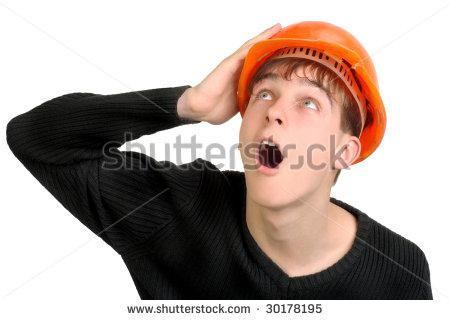

In [ ]:
images = list(glob.glob(os.path.join(images_dir,'*.jpg')))
PIL.Image.open(str(images[1000]))

In [ ]:
print(len(images))

12121


In [ ]:
labels_file="/content/drive/MyDrive/Colab Notebooks/data/label/label.lst"
df = pd.read_csv(labels_file, header=None, delimiter=" ", names=['image_name', 'face_id_in_image', 'face_box_top', "face_box_left", 'face_box_right', 'face_box_bottom', 'face_box_confidence', 'expression_label',])

In [ ]:
df.head()

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_confidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0


In [ ]:
labels=["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

In [ ]:
new_data_path="/content/drive/MyDrive/Colab Notebooks/new_data"

In [ ]:
for lbl in labels:
  os.makedirs(os.path.join(new_data_path, lbl),exist_ok=True)

In [ ]:
mapper={0:"angry", 1:"disgust", 2:"fear", 3:"happy", 4:"sad", 5:"surprise", 6:"neutra"}

In [ ]:
import cv2
extracted_path_folder = r'/content/drive/MyDrive/Colab Notebooks/extracted'
final_data_path = r"/content/drive/MyDrive/Colab Notebooks/new_data"

In [ ]:
from tqdm import tqdm

In [ ]:
import shutil

In [ ]:
for label in tqdm(df.expression_label.unique()):
  df_d=df[df.expression_label==label]
  emotion=mapper[label]
  for image_name in df_d.image_name:
    img_path=os.path.join(extracted_path_folder, image_name)
    if os.path.exists(img_path):
      dst_path=os.path.join(final_data_path,emotion)
      shutil.copy(img_path,dst_path)

 14%|█▍        | 1/7 [02:16<13:37, 136.30s/it]

In [ ]:
import os
import cv2

# Set the path to the directory containing your original data
directory_path = "/content/drive/MyDrive/Colab Notebooks/extracted"
# Set the target size you want to resize the images to
target_size = (128, 128)  # Change this to your desired size

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)

    # Check if the file is an image (you can add more image extensions if needed)
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        # Read the image
        image = cv2.imread(file_path)

        # Resize the image
        resized_image = cv2.resize(image, target_size)

        # Save the resized image with the same filename
        cv2.imwrite(file_path, resized_image)

print("Resizing complete!")


Resizing complete!


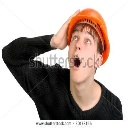

In [ ]:
images = list(glob.glob(os.path.join(images_dir,'*.jpg')))
PIL.Image.open(str(images[1000]))

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Replace with your dataset directory
data_directory = "/content/drive/MyDrive/Colab Notebooks/extracted"

# Replace with the destination directory where split data will be saved
destination_directory = "/content/drive/MyDrive/Colab Notebooks/split_data"

# Define split ratios
train_ratio = 0.7
test_ratio = 0.15
validation_ratio = 0.15

# List all image filenames in the dataset directory
all_images = os.listdir(data_directory)

# Shuffle the list of images
random.shuffle(all_images)

# Split data into training, testing, and validation sets
train_images, test_valid_images = train_test_split(all_images, train_size=train_ratio, random_state=42)
test_images, validation_images = train_test_split(test_valid_images, train_size=test_ratio/(test_ratio + validation_ratio), random_state=42)

# Create directories to store the split data
os.makedirs(os.path.join(destination_directory, "train"), exist_ok=True)
os.makedirs(os.path.join(destination_directory, "test"), exist_ok=True)
os.makedirs(os.path.join(destination_directory, "validation"), exist_ok=True)

# Move images to their respective directories
for image in train_images:
    shutil.copy(os.path.join(data_directory, image), os.path.join(destination_directory, "train"))

for image in test_images:
    shutil.copy(os.path.join(data_directory, image), os.path.join(destination_directory, "test"))
for image in validation_images:
    shutil.copy(os.path.join(data_directory, image), os.path.join(destination_directory, "validation"))

print("Data split and saved successfully.")

Data split and saved successfully.


In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/split_data/train"
data_dir = "/content/drive/MyDrive/Colab Notebooks/new_data"

In [ ]:
batch_size = 32
img_height = 128
img_width = 128

In [ ]:
train_dir = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6961 files belonging to 7 classes.
Using 5569 files for training.


In [ ]:
val_dir = "/content/drive/MyDrive/Colab Notebooks/split_data/validation"
data_dir = "/content/drive/MyDrive/Colab Notebooks/new_data"

In [ ]:
val_dir = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6961 files belonging to 7 classes.
Using 1392 files for validation.


In [ ]:
class_names = train_dir.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


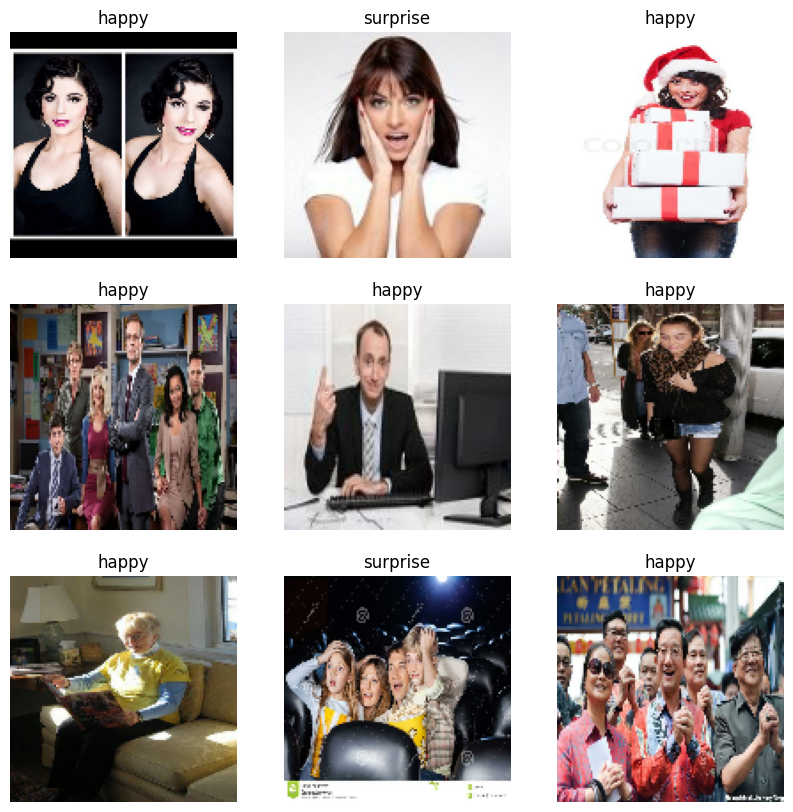

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_dir:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_dir = train_dir.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dir))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = 7

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [ ]:
model.fit(
  train_dir,
  validation_data=val_dir,
  epochs=10
)

Epoch 1/10
175/175 [==============================] - 1404s 8s/step - loss: 1.0831 - accuracy: 0.6567 - val_loss: 1.0527 - val_accuracy: 0.6717
Epoch 2/10
175/175 [==============================] - 176s 990ms/step - loss: 1.0263 - accuracy: 0.6698 - val_loss: 0.9726 - val_accuracy: 0.6839
Epoch 3/10
175/175 [==============================] - 208s 1s/step - loss: 0.9921 - accuracy: 0.6845 - val_loss: 0.9854 - val_accuracy: 0.6882
Epoch 4/10
175/175 [==============================] - 181s 1s/step - loss: 0.9647 - accuracy: 0.6831 - val_loss: 0.9894 - val_accuracy: 0.6832
Epoch 5/10
175/175 [==============================] - 179s 1s/step - loss: 0.9075 - accuracy: 0.6944 - val_loss: 1.1056 - val_accuracy: 0.6652
Epoch 6/10
175/175 [==============================] - 182s 1s/step - loss: 0.8464 - accuracy: 0.6989 - val_loss: 1.1125 - val_accuracy: 0.6825
Epoch 7/10
175/175 [==============================] - 180s 1s/step - loss: 0.7446 - accuracy: 0.7348 - val_loss: 1.3664 - val_accuracy: 0.